# House Data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
I_D = pd.read_csv('./Datas/dataset_apartment.csv', sep=',', na_values='None', index_col=0)
I_D

,type_of_property,subtype_of_property,locality,province,région,price,number_of_facades,house_area,house_area_cat,number_of_rooms,...,terrace,terrace_area,open_fire,swimming_pool,state_of_the_building,construction_year,construction_year_cat,price_per_m²,commune,rank_commune
0,apartment,apartment,4000,Liège,Région wallonne,45000,2.0,47.0,[0-60 m²],1,...,1,2.0,0,0,good,1958.0,1940-1959,957.45,LIÈGE,240.0
1,apartment,apartment,1030,Bruxelles-Capitale,Région Bruxelles-capitale,50000,NaN,96.0,]60-120 m²],2,...,0,NaN,0,0,good,1960.0,1960-1979,520.83,SCHAERBEEK,540.0
2,apartment,service flat,2930,Anvers,Région flamande,50000,3.0,83.0,]60-120 m²],2,...,1,NaN,0,0,NaN,2016.0,2000-,602.41,BRASSCHAAT,499.0
3,apartment,apartment,8420,Flandre-Occidentale,Région flamande,49500,2.0,31.0,[0-60 m²],1,...,0,NaN,0,0,good,1966.0,1960-1979,1596.77,DE HAAN,563.0
4,apartment,apartment,7301,Hainaut,Région wallonne,50000,2.0,49.0,[0-60 m²],1,...,0,NaN,0,0,NaN,NaN,NaN,1020.41,BOUSSU,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19831,apartment,apartment,8300,Flandre-Occidentale,Région flamande,950000,2.0,157.0,]120-180 m²],2,...,0,NaN,0,0,good,NaN,NaN,6050.96,KNOKKE-HEIST,580.0
19832,apartment,penthouse,3700,Limbourg,Région flamande,945000,NaN,164.0,]120-180 m²],3,...,0,NaN,0,0,as new,NaN,NaN,5762.20,TONGEREN,293.0
19833,apartment,apartment,6940,Luxembourg,Région wallonne,950000,NaN,111.0,]60-120 m²],2,...,1,115.0,0,0,NaN,2020.0,2000-,8558.56,DURBUY,297.0
19834,apartment,ground floor,8000,Flandre-Occidentale,Région flamande,950000,NaN,182.0,]180-240 m²],2,...,0,NaN,0,0,just renovated,NaN,NaN,5219.78,BRUGGE,556.0


In [4]:
I_D.columns

Index(['type_of_property', 'subtype_of_property', 'locality', 'province',
       'région', 'price', 'number_of_facades', 'house_area', 'house_area_cat',
       'number_of_rooms', 'number_of_rooms_cat', 'surface_of_the_land',
       'surface_of_the_land_cat', 'fully_equipped_kitchen', 'garden',
       'garden_area', 'terrace', 'terrace_area', 'open_fire', 'swimming_pool',
       'state_of_the_building', 'construction_year', 'construction_year_cat',
       'price_per_m²', 'commune', 'rank_commune'],
      dtype='object')

In [3]:
I_D.number_of_facades.value_counts()

2.0    8090
3.0    1984
4.0    1670
1.0     327
Name: number_of_facades, dtype: int64

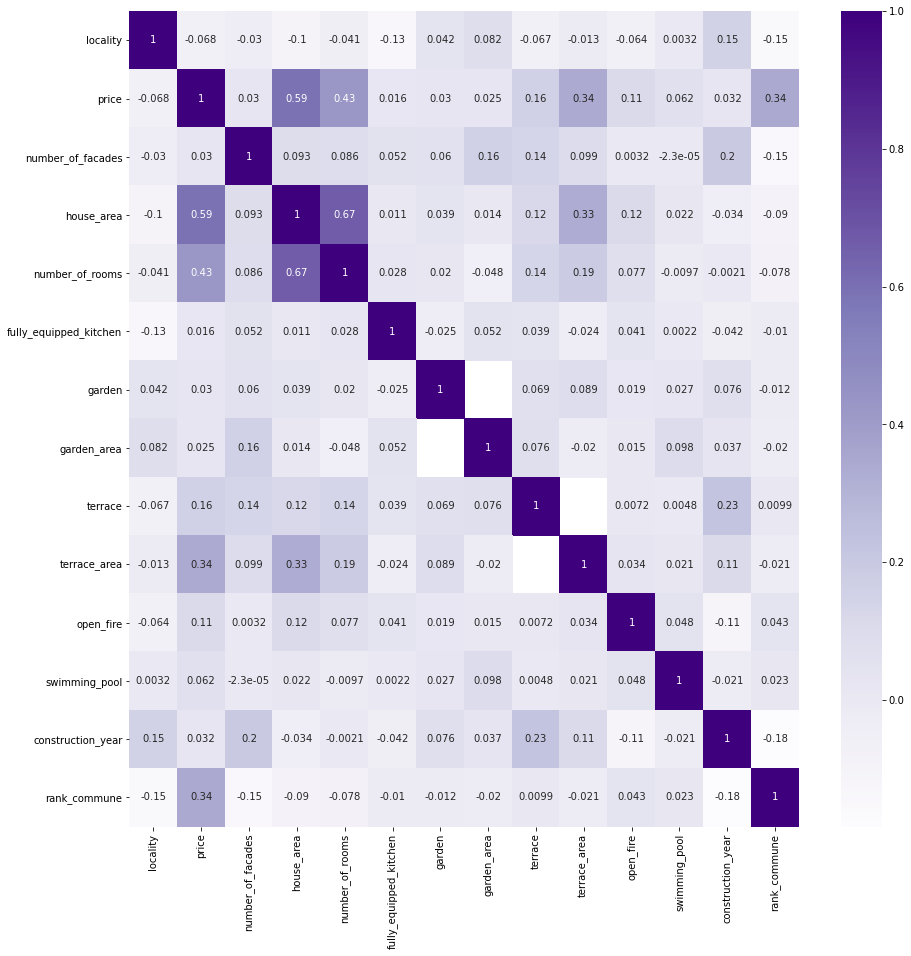

In [6]:
var_corr = I_D[['type_of_property', 'subtype_of_property', 'locality', 'province',
       'région', 'price', 'number_of_facades', 'house_area', 'house_area_cat',
       'number_of_rooms', 'number_of_rooms_cat',
        'fully_equipped_kitchen', 'garden',
       'garden_area', 'terrace', 'terrace_area', 'open_fire', 'swimming_pool',
       'state_of_the_building', 'construction_year', 'construction_year_cat',
       'commune', 'rank_commune']].corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(var_corr, xticklabels=var_corr.columns, yticklabels=var_corr.columns, annot=True, cmap="Purples")